In [1]:
library(tidyverse)
library(RColorBrewer)
library(cowplot)
library(patchwork)
library(readxl)
library(scales)

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.0 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




# Figure 4: correlating individual features with vaccine response

In [2]:
stool_metadata = read_csv('../data/metadata/stool/stool_metadata.csv') %>%
                     left_join(read_csv('../data/metadata/stool/stool_titers_yr1.csv'), by = 'SampleID')
stool_metadata = stool_metadata %>% filter(gt_2.5 == TRUE)
stool_metadata %>% head

Rows: 709 Columns: 26
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (11): SampleID, SubmissionType, DiversigenCheckInSampleName, BoxLocatio...
dbl   (7): SampleNumber, BabyN, Plate, Row, Column, age_at_collection, Count
lgl   (6): SampleIDValidation, BabyN_checked, DOB_checked, CollectionDate_ch...
date  (2): DOB, CollectionDate

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 594 Columns: 57
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): SampleID, VR_group, VR_group_v2
dbl (48): PT, Dip, FHA, PRN, TET, PRP (Hib), PCV ST1, PCV ST3, PCV ST4, PCV ...
lgl  (6): PT_protected, Dip_protected, FHA_protected, PRN_protected, TET_pro...

ℹ Use `spec(

SampleID,SubmissionType,SampleNumber,SampleIDValidation,DiversigenCheckInSampleName,BoxLocation,SampleType,SampleSource,SequencingType,BabyN,⋯,median_mmNorm_PCV,median_mmNorm_DTAPHib,protectNorm_Dip,protectNorm_TET,protectNorm_PRP (Hib),protectNorm_PT,protectNorm_PRN,protectNorm_FHA,geommean_protectNorm,VR_group_v2
<chr>,<chr>,<dbl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
204_V5,Primary in Tube,1,NA,204_S,"Box 7, A1",Stool,Human Infant,MetaG,204,⋯,0.371980062,0.1927305,4.0,NA,NA,0.3125,0.6250,5.1250,1.4145587,LVR
226_V1,Primary in Tube,2,NA,NA,"Box 7, A2",Stool,Human Infant,MetaG,226,⋯,0.139576233,0.2057416,2.5,8.2,15.00000,0.7500,2.5000,1.3750,3.0422263,HVR
107_V3,Primary in Tube,3,NA,NA,"Box 7, A3",Stool,Human Infant,MetaG,107,⋯,0.958142022,0.1140184,4.4,5.2,10.66667,0.3125,1.1250,0.3750,1.7834178,NVR
108_V3,Primary in Tube,4,NA,NA,"Box 7, A4",Stool,Human Infant,MetaG,108,⋯,0.003102229,0.0000000,0.5,0.5,1.80000,0.3125,0.3125,0.1875,0.4494199,LVR
109_V1,Primary in Tube,5,NA,NA,"Box 7, A5",Stool,Human Infant,MetaG,109,⋯,0.486809637,0.7630493,NA,13.5,46.80000,3.3750,7.8750,NA,11.3835047,HVR
108_V2,Primary in Tube,6,NA,NA,"Box 7, A6",Stool,Human Infant,MetaG,108,⋯,0.003102229,0.0000000,0.5,0.5,1.80000,0.3125,0.3125,0.1875,0.4494199,LVR


In [3]:
stool_metadata_V5 = stool_metadata %>% filter(VisitCode == 'V5')
stool_metadata_V5 %>% head

SampleID,SubmissionType,SampleNumber,SampleIDValidation,DiversigenCheckInSampleName,BoxLocation,SampleType,SampleSource,SequencingType,BabyN,⋯,median_mmNorm_PCV,median_mmNorm_DTAPHib,protectNorm_Dip,protectNorm_TET,protectNorm_PRP (Hib),protectNorm_PT,protectNorm_PRN,protectNorm_FHA,geommean_protectNorm,VR_group_v2
<chr>,<chr>,<dbl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
204_V5,Primary in Tube,1,NA,204_S,"Box 7, A1",Stool,Human Infant,MetaG,204,⋯,0.37198006,0.19273050,4.0,NA,NA,0.3125,0.6250,5.1250,1.414559,LVR
203_V5,Primary in Tube,8,NA,NA,"Box 7, B2",Stool,Human Infant,MetaG,203,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
206_V5,Primary in Tube,23,NA,NA,"Box 7, D5",Stool,Human Infant,MetaG,206,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
208_V5,Primary in Tube,24,NA,NA,"Box 7, D6",Stool,Human Infant,MetaG,208,⋯,0.12541559,0.11305537,3.2,1.4,6.066667,0.7500,0.3125,1.1250,1.388509,NVR
209_V5,Primary in Tube,29,NA,NA,"Box 7, E5",Stool,Human Infant,MetaG,209,⋯,0.07497244,0.10508739,2.9,2.7,7.800000,0.6250,0.6250,0.8750,1.659348,NVR
201_V5,Primary in Tube,30,NA,NA,"Box 7, E6",Stool,Human Infant,MetaG,201,⋯,0.39284955,0.05592317,3.5,3.7,4.600000,0.3125,0.7500,0.1875,1.173969,NVR


In [4]:
stool_metadata_V5_PCV = stool_metadata %>% filter(VisitCode == 'V5') %>% drop_na(median_mmNorm_PCV)
stool_metadata_V5_PCV %>% head

SampleID,SubmissionType,SampleNumber,SampleIDValidation,DiversigenCheckInSampleName,BoxLocation,SampleType,SampleSource,SequencingType,BabyN,⋯,median_mmNorm_PCV,median_mmNorm_DTAPHib,protectNorm_Dip,protectNorm_TET,protectNorm_PRP (Hib),protectNorm_PT,protectNorm_PRN,protectNorm_FHA,geommean_protectNorm,VR_group_v2
<chr>,<chr>,<dbl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
204_V5,Primary in Tube,1,NA,204_S,"Box 7, A1",Stool,Human Infant,MetaG,204,⋯,0.37198006,0.19273050,4.0,NA,NA,0.3125,0.6250,5.1250,1.414559,LVR
208_V5,Primary in Tube,24,NA,NA,"Box 7, D6",Stool,Human Infant,MetaG,208,⋯,0.12541559,0.11305537,3.2,1.4,6.066667,0.7500,0.3125,1.1250,1.388509,NVR
209_V5,Primary in Tube,29,NA,NA,"Box 7, E5",Stool,Human Infant,MetaG,209,⋯,0.07497244,0.10508739,2.9,2.7,7.800000,0.6250,0.6250,0.8750,1.659348,NVR
201_V5,Primary in Tube,30,NA,NA,"Box 7, E6",Stool,Human Infant,MetaG,201,⋯,0.39284955,0.05592317,3.5,3.7,4.600000,0.3125,0.7500,0.1875,1.173969,NVR
211_V5,Primary in Tube,36,NA,NA,"Box 7, F6",Stool,Human Infant,MetaG,211,⋯,0.39287027,0.11533022,6.6,4.8,4.466667,0.7500,1.2500,0.7500,2.152618,NVR
228_V5,Primary in Tube,48,NA,NA,"Box 8, B6",Stool,Human Infant,MetaG,228,⋯,0.15421064,0.12725890,1.1,5.3,16.066667,0.3125,3.1250,0.8750,2.075951,NVR


In [5]:
ko_abunds = read.table('../data/stool/ko_abundance_table.rel.tsv', header = T, row.names = 1, check.names = F) %>%
                t %>% as_tibble(rownames = 'SampleID')
cleaned_sample_ids = ko_abunds$SampleID %>% str_split(pattern = '\\.') %>% map_chr(1)
ko_abunds = ko_abunds %>% mutate(SampleID = cleaned_sample_ids)
ko_abunds %>% head

SampleID,K00001,K00002,K00003,K00004,K00005,K00006,K00007,K00008,K00009,⋯,K22447,K22450,K22452,K22455,K22457,K22460,K22461,K22463,K22465,K22468
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
101_S1,0.0003033068,0,3.296546e-04,1.237737e-04,0.0010073462,0,3.798994e-05,7.291618e-05,2.530620e-04,⋯,0,0,0,0,2.450964e-06,0,0,0,0,5.759765e-05
101_V3,0.0002497238,0,4.899794e-04,1.207196e-04,0.0010770078,0,2.367050e-06,1.059255e-04,1.988322e-04,⋯,0,0,0,0,5.917625e-06,0,0,0,0,5.325863e-06
101_V5,0.0002796035,0,3.933638e-04,1.206133e-04,0.0012410834,0,5.002710e-05,2.247793e-04,2.713799e-04,⋯,0,0,0,0,1.370606e-06,0,0,0,0,4.180347e-05
102_V1,0.0001099041,0,6.532763e-05,0.000000e+00,0.0003573806,0,4.303938e-05,1.429522e-04,2.636162e-04,⋯,0,0,0,0,1.537121e-06,0,0,0,0,2.382537e-05
102_V3,0.0002081547,0,8.326189e-05,1.125161e-06,0.0001789005,0,4.838191e-05,5.063223e-05,9.113801e-05,⋯,0,0,0,0,0.000000e+00,0,0,0,0,3.150450e-05
102_V5,0.0008448294,0,1.064975e-03,1.084660e-05,0.0001301592,0,2.852253e-05,1.365868e-05,6.869511e-05,⋯,0,0,0,0,1.044487e-05,0,0,0,0,1.807766e-05


In [6]:
stool_data_V5 = inner_join(stool_metadata_V5, ko_abunds, by = 'SampleID')
stool_data_V5 %>% head

SampleID,SubmissionType,SampleNumber,SampleIDValidation,DiversigenCheckInSampleName,BoxLocation,SampleType,SampleSource,SequencingType,BabyN,⋯,K22447,K22450,K22452,K22455,K22457,K22460,K22461,K22463,K22465,K22468
<chr>,<chr>,<dbl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
204_V5,Primary in Tube,1,NA,204_S,"Box 7, A1",Stool,Human Infant,MetaG,204,⋯,0,0,0.000000e+00,0,0.000000e+00,0,0,0,0,0.000000e+00
203_V5,Primary in Tube,8,NA,NA,"Box 7, B2",Stool,Human Infant,MetaG,203,⋯,0,0,0.000000e+00,0,1.790770e-05,0,0,0,0,6.932013e-06
206_V5,Primary in Tube,23,NA,NA,"Box 7, D5",Stool,Human Infant,MetaG,206,⋯,0,0,0.000000e+00,0,0.000000e+00,0,0,0,0,1.198599e-05
208_V5,Primary in Tube,24,NA,NA,"Box 7, D6",Stool,Human Infant,MetaG,208,⋯,0,0,6.496413e-07,0,4.547489e-06,0,0,0,0,3.897848e-05
209_V5,Primary in Tube,29,NA,NA,"Box 7, E5",Stool,Human Infant,MetaG,209,⋯,0,0,0.000000e+00,0,1.794967e-06,0,0,0,0,0.000000e+00
201_V5,Primary in Tube,30,NA,NA,"Box 7, E6",Stool,Human Infant,MetaG,201,⋯,0,0,0.000000e+00,0,1.180069e-06,0,0,0,0,1.180069e-06


In [7]:
stool_data_V5_PCV = inner_join(stool_metadata_V5_PCV, ko_abunds, by = 'SampleID')
stool_data_V5_PCV %>% head

SampleID,SubmissionType,SampleNumber,SampleIDValidation,DiversigenCheckInSampleName,BoxLocation,SampleType,SampleSource,SequencingType,BabyN,⋯,K22447,K22450,K22452,K22455,K22457,K22460,K22461,K22463,K22465,K22468
<chr>,<chr>,<dbl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
204_V5,Primary in Tube,1,NA,204_S,"Box 7, A1",Stool,Human Infant,MetaG,204,⋯,0,0,0.000000e+00,0,0.000000e+00,0,0,0,0,0.000000e+00
208_V5,Primary in Tube,24,NA,NA,"Box 7, D6",Stool,Human Infant,MetaG,208,⋯,0,0,6.496413e-07,0,4.547489e-06,0,0,0,0,3.897848e-05
209_V5,Primary in Tube,29,NA,NA,"Box 7, E5",Stool,Human Infant,MetaG,209,⋯,0,0,0.000000e+00,0,1.794967e-06,0,0,0,0,0.000000e+00
201_V5,Primary in Tube,30,NA,NA,"Box 7, E6",Stool,Human Infant,MetaG,201,⋯,0,0,0.000000e+00,0,1.180069e-06,0,0,0,0,1.180069e-06
211_V5,Primary in Tube,36,NA,NA,"Box 7, F6",Stool,Human Infant,MetaG,211,⋯,0,0,0.000000e+00,0,1.223605e-05,0,0,0,0,5.710156e-06
228_V5,Primary in Tube,48,NA,NA,"Box 8, B6",Stool,Human Infant,MetaG,228,⋯,0,0,0.000000e+00,0,7.833295e-07,0,0,0,0,7.833295e-07


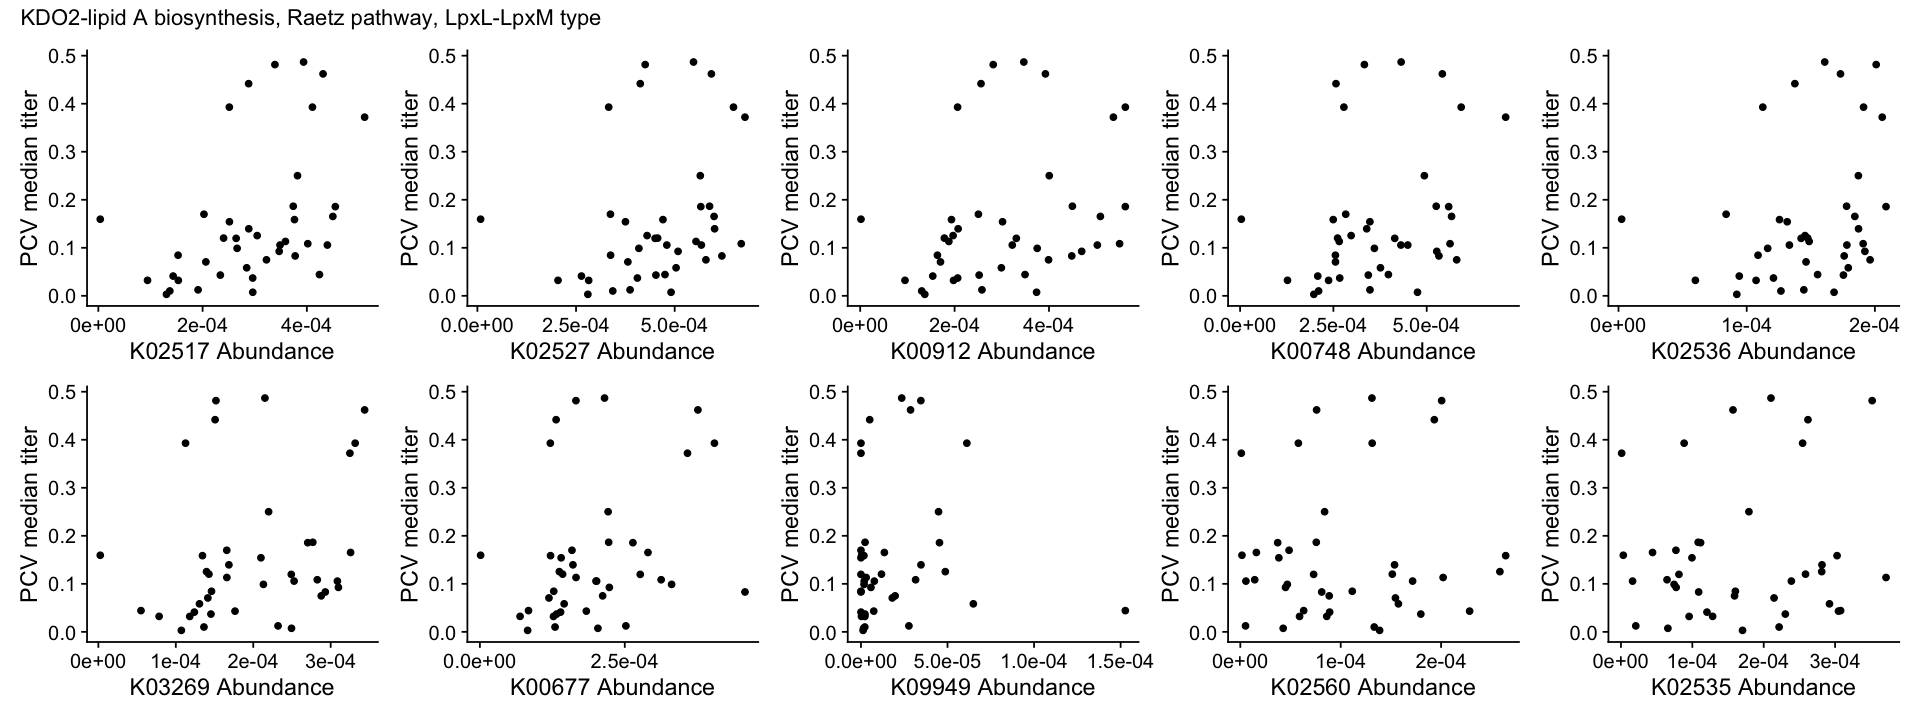

In [8]:
options(repr.plot.width=16, repr.plot.height=6)

K02517_plot = stool_data_V5_PCV %>% ggplot(aes(x=K02517, y=median_mmNorm_PCV)) + geom_point() +
                                        theme_cowplot() + labs(x = "K02517 Abundance", y = "PCV median titer") +
                                        scale_x_continuous(n.breaks = 4, labels = label_scientific(digits = 2))
K02527_plot = stool_data_V5_PCV %>% ggplot(aes(x=K02527, y=median_mmNorm_PCV)) + geom_point() +
                                        theme_cowplot() + labs(x = "K02527 Abundance", y = "PCV median titer") +
                                        scale_x_continuous(n.breaks = 4, labels = label_scientific(digits = 2))
K00912_plot = stool_data_V5_PCV %>% ggplot(aes(x=K00912, y=median_mmNorm_PCV)) + geom_point() +
                                        theme_cowplot() + labs(x = "K00912 Abundance", y = "PCV median titer") +
                                        scale_x_continuous(n.breaks = 4, labels = label_scientific(digits = 2))
K00748_plot = stool_data_V5_PCV %>% ggplot(aes(x=K00748, y=median_mmNorm_PCV)) + geom_point() +
                                        theme_cowplot() + labs(x = "K00748 Abundance", y = "PCV median titer") +
                                        scale_x_continuous(n.breaks = 4, labels = label_scientific(digits = 2))
K02536_plot = stool_data_V5_PCV %>% ggplot(aes(x=K02536, y=median_mmNorm_PCV)) + geom_point() +
                                        theme_cowplot() + labs(x = "K02536 Abundance", y = "PCV median titer") +
                                        scale_x_continuous(n.breaks = 4, labels = label_scientific(digits = 2))
K03269_plot = stool_data_V5_PCV %>% ggplot(aes(x=K03269, y=median_mmNorm_PCV)) + geom_point() +
                                        theme_cowplot() + labs(x = "K03269 Abundance", y = "PCV median titer") +
                                        scale_x_continuous(n.breaks = 4, labels = label_scientific(digits = 2))
K00677_plot = stool_data_V5_PCV %>% ggplot(aes(x=K00677, y=median_mmNorm_PCV)) + geom_point() +
                                        theme_cowplot() + labs(x = "K00677 Abundance", y = "PCV median titer") +
                                        scale_x_continuous(n.breaks = 4, labels = label_scientific(digits = 2))
K09949_plot = stool_data_V5_PCV %>% ggplot(aes(x=K09949, y=median_mmNorm_PCV)) + geom_point() +
                                        theme_cowplot() + labs(x = "K09949 Abundance", y = "PCV median titer") +
                                        scale_x_continuous(n.breaks = 4, labels = label_scientific(digits = 2))
K02560_plot = stool_data_V5_PCV %>% ggplot(aes(x=K02560, y=median_mmNorm_PCV)) + geom_point() +
                                        theme_cowplot() + labs(x = "K02560 Abundance", y = "PCV median titer") +
                                        scale_x_continuous(n.breaks = 4, labels = label_scientific(digits = 2))
K02535_plot = stool_data_V5_PCV %>% ggplot(aes(x=K02535, y=median_mmNorm_PCV)) + geom_point() +
                                        theme_cowplot() + labs(x = "K02535 Abundance", y = "PCV median titer") +
                                        scale_x_continuous(n.breaks = 4, labels = label_scientific(digits = 2))

m00060_scatter_plots = wrap_plots(K02517_plot, K02527_plot, K00912_plot, K00748_plot, K02536_plot,
                                  K03269_plot, K00677_plot, K09949_plot, K02560_plot, K02535_plot, nrow=2) +
                       plot_annotation(title ='KDO2-lipid A biosynthesis, Raetz pathway, LpxL-LpxM type')
m00060_scatter_plots

Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 12 rows containing missing

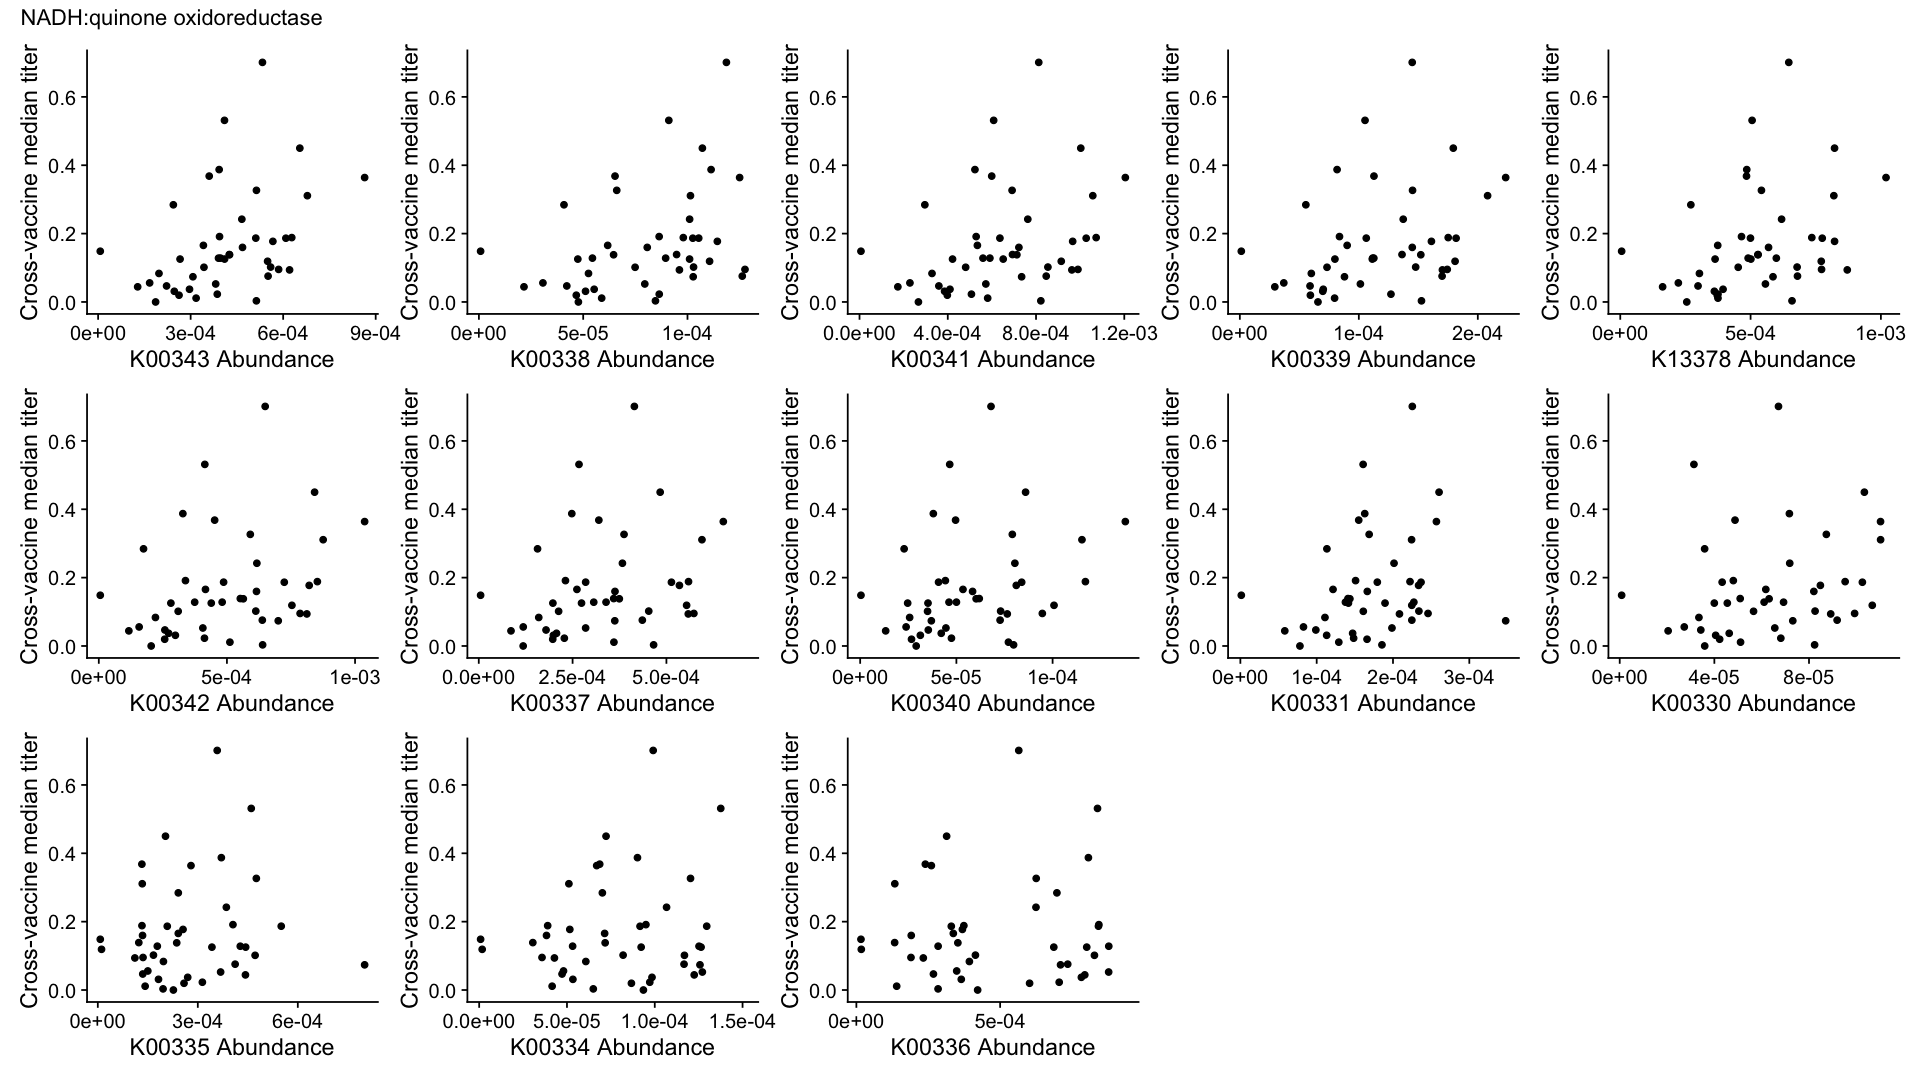

In [9]:
options(repr.plot.width=16, repr.plot.height=9)

K00334_plot = stool_data_V5 %>% ggplot(aes(x=K00334, y=median_mmNorm)) + geom_point() +
                                       theme_cowplot() + labs(x = "K00334 Abundance", y = "Cross-vaccine median titer") +
                                       scale_x_continuous(n.breaks = 4, labels = label_scientific(digits = 2))
K00332_plot = stool_data_V5 %>% ggplot(aes(x=K00332, y=median_mmNorm)) + geom_point() +
                                       theme_cowplot() + labs(x = "K00332 Abundance", y = "Cross-vaccine median titer") +
                                       scale_x_continuous(n.breaks = 4, labels = label_scientific(digits = 2))
K00339_plot = stool_data_V5 %>% ggplot(aes(x=K00339, y=median_mmNorm)) + geom_point() +
                                       theme_cowplot() + labs(x = "K00339 Abundance", y = "Cross-vaccine median titer") +
                                       scale_x_continuous(n.breaks = 4, labels = label_scientific(digits = 2))
K13378_plot = stool_data_V5 %>% ggplot(aes(x=K13378, y=median_mmNorm)) + geom_point() +
                                       theme_cowplot() + labs(x = "K13378 Abundance", y = "Cross-vaccine median titer") +
                                       scale_x_continuous(n.breaks = 4, labels = label_scientific(digits = 2))
K00341_plot = stool_data_V5 %>% ggplot(aes(x=K00341, y=median_mmNorm)) + geom_point() +
                                       theme_cowplot() + labs(x = "K00341 Abundance", y = "Cross-vaccine median titer") +
                                       scale_x_continuous(n.breaks = 4, labels = label_scientific(digits = 2))
K00343_plot = stool_data_V5 %>% ggplot(aes(x=K00343, y=median_mmNorm)) + geom_point() +
                                       theme_cowplot() + labs(x = "K00343 Abundance", y = "Cross-vaccine median titer") +
                                       scale_x_continuous(n.breaks = 4, labels = label_scientific(digits = 2))
K00337_plot = stool_data_V5 %>% ggplot(aes(x=K00337, y=median_mmNorm)) + geom_point() +
                                       theme_cowplot() + labs(x = "K00337 Abundance", y = "Cross-vaccine median titer") +
                                       scale_x_continuous(n.breaks = 4, labels = label_scientific(digits = 2))
K00331_plot = stool_data_V5 %>% ggplot(aes(x=K00331, y=median_mmNorm)) + geom_point() +
                                       theme_cowplot() + labs(x = "K00331 Abundance", y = "Cross-vaccine median titer") +
                                       scale_x_continuous(n.breaks = 4, labels = label_scientific(digits = 2))
K00338_plot = stool_data_V5 %>% ggplot(aes(x=K00338, y=median_mmNorm)) + geom_point() +
                                       theme_cowplot() + labs(x = "K00338 Abundance", y = "Cross-vaccine median titer") +
                                       scale_x_continuous(n.breaks = 4, labels = label_scientific(digits = 2))
K00342_plot = stool_data_V5 %>% ggplot(aes(x=K00342, y=median_mmNorm)) + geom_point() +
                                       theme_cowplot() + labs(x = "K00342 Abundance", y = "Cross-vaccine median titer") +
                                       scale_x_continuous(n.breaks = 4, labels = label_scientific(digits = 2))
K00330_plot = stool_data_V5 %>% ggplot(aes(x=K00330, y=median_mmNorm)) + geom_point() +
                                       theme_cowplot() + labs(x = "K00330 Abundance", y = "Cross-vaccine median titer") +
                                       scale_x_continuous(n.breaks = 4, labels = label_scientific(digits = 2))
K13380_plot = stool_data_V5 %>% ggplot(aes(x=K13380, y=median_mmNorm)) + geom_point() +
                                       theme_cowplot() + labs(x = "K13380 Abundance", y = "Cross-vaccine median titer") +
                                       scale_x_continuous(n.breaks = 4, labels = label_scientific(digits = 2))
K00335_plot = stool_data_V5 %>% ggplot(aes(x=K00335, y=median_mmNorm)) + geom_point() +
                                       theme_cowplot() + labs(x = "K00335 Abundance", y = "Cross-vaccine median titer") +
                                       scale_x_continuous(n.breaks = 4, labels = label_scientific(digits = 2))
K00333_plot = stool_data_V5 %>% ggplot(aes(x=K00333, y=median_mmNorm)) + geom_point() +
                                       theme_cowplot() + labs(x = "K00333 Abundance", y = "Cross-vaccine median titer") +
                                       scale_x_continuous(n.breaks = 4, labels = label_scientific(digits = 2))
K00336_plot = stool_data_V5 %>% ggplot(aes(x=K00336, y=median_mmNorm)) + geom_point() +
                                       theme_cowplot() + labs(x = "K00336 Abundance", y = "Cross-vaccine median titer") +
                                       scale_x_continuous(n.breaks = 4, labels = label_scientific(digits = 2))
K00340_plot = stool_data_V5 %>% ggplot(aes(x=K00340, y=median_mmNorm)) + geom_point() +
                                       theme_cowplot() + labs(x = "K00340 Abundance", y = "Cross-vaccine median titer") +
                                       scale_x_continuous(n.breaks = 4, labels = label_scientific(digits = 2))

m00144_scatter_plots = wrap_plots(K00343_plot, K00338_plot, K00341_plot, K00339_plot, K13378_plot, K00342_plot,
                                  K00337_plot, K00340_plot, K00331_plot, K00330_plot, K00335_plot, K00334_plot,
                                  K00336_plot, nrow=3) +
                       plot_annotation(title ='NADH:quinone oxidoreductase')
m00144_scatter_plots

In [10]:
v5_enrichment = read_tsv('../data/stool/ko_correlation_enrichment_V5.tsv') %>% mutate(GeneRatio = in_in / (in_in + in_out)) %>%
                    mutate(module = factor(module, levels=module)) %>% mutate(log_p = -1*log10(p_adj))
v5_enrichment %>% filter(p_value < .05)

Rows: 304 Columns: 9
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): module
dbl (8): module_size, in_in, in_out, out_in, out_out, odds_ratio, p_value, p...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


module,module_size,in_in,in_out,out_in,out_out,odds_ratio,p_value,p_adj,GeneRatio,log_p
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M00060,10,7,371,3,2134,13.421384,0.0001309232,0.02327840,0.018518519,1.633047
M00144,16,9,369,7,2130,7.421603,0.0001531474,0.02327840,0.023809524,1.633047
M00866,11,7,371,4,2133,10.061321,0.0003137273,0.03179103,0.018518519,1.497695
M00913,5,3,375,2,2135,8.540000,0.0266214110,1.00000000,0.007936508,0.000000
M00116,9,4,374,5,2132,4.560428,0.0338859658,1.00000000,0.010582011,0.000000


Saving 7 x 7 in image


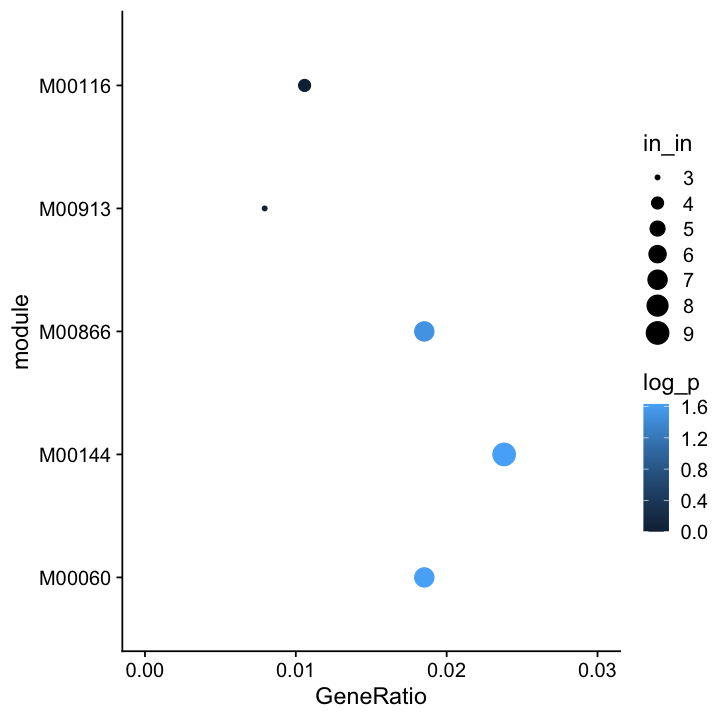

In [11]:
options(repr.plot.width=6, repr.plot.height=6)
enirchment_plot = v5_enrichment %>% filter(p_value < .05) %>% 
                    ggplot(aes(x=GeneRatio, y=module, size=in_in, color=log_p)) + geom_point() +
                        theme_cowplot() + xlim(0, 0.03)
enirchment_plot
ggsave("../figures/ko_module_enrichment_crossvaccine_yr1.pdf", dpi=300)

NOTE: this is enrichment with correlation with median titer. Subsequent plot is correlations with median PCV titer because that module is also significant in PCV correlated genes but not DTapHib correlated genes. The plot for PCV looks way worse because for some reason the gene ratio are like all the same and there is a narrowly non-significant module which makes the colors not look great.

In [12]:
# options(repr.plot.width=18, repr.plot.height=5)
# ko_plots = enirchment_plot + m00060_scatter_plots + plot_layout(widths = c(1, 5))
# ko_plots

In [13]:
year1_titer_data = read_tsv('../data/vaccine_response/vaccine_response_y1.tsv')
year1_titer_data %>% head

Rows: 72 Columns: 49
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (2): BabyN, VR_group
dbl (41): PT, Dip, FHA, PRN, TET, PRP (Hib), PCV ST1, PCV ST3, PCV ST4, PCV ...
lgl  (6): PT_protected, Dip_protected, FHA_protected, PRN_protected, TET_pro...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


BabyN,PT,Dip,FHA,PRN,TET,PRP (Hib),PCV ST1,PCV ST3,PCV ST4,⋯,median_mmNorm,median_mmNorm_DTAPHib,median_mmNorm_PCV,PT_protected,Dip_protected,FHA_protected,PRN_protected,TET_protected,PRP (Hib)_protected,VR_group
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>
Baby106,2.5,0.21,11.0,2.5,0.30,0.39,141.0000,35.00000,56.00000,⋯,0.06195543,0.05287358,0.061955427,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,NVR
Baby107,2.5,0.44,3.0,9.0,0.52,1.60,2430.0000,415.00000,194.00000,⋯,0.44948288,0.11401837,0.958142022,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,NVR
Baby108,2.5,0.05,1.5,2.5,0.05,0.27,21.0000,3.00000,24.00000,⋯,0.00000000,0.00000000,0.003102229,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,LVR
Baby109,27.0,NA,NA,63.0,1.35,7.02,NA,NA,NA,⋯,0.70092488,0.76304931,0.486809637,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,NVR
Baby110,14.0,0.24,15.0,20.0,2.45,NA,301.0000,63.00000,400.00000,⋯,0.26621874,0.28421053,0.245121350,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,NVR
Baby113,9.0,0.05,15.0,25.0,0.73,3.70,180.7802,94.15769,94.99627,⋯,0.20949062,0.27475832,0.127382903,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,NVR


In [14]:
metab_abunds = read_excel('../data/metabolomics_abunds.xlsx') %>%
                   separate(`Compound name`, c('BabyN', 'VisitCode', 'VisitDate')) %>%
                   mutate(BabyN = paste0('Baby', substring(BabyN, 2))) %>%
                   left_join(year1_titer_data, by='BabyN')
head(metab_abunds)

BabyN,VisitCode,VisitDate,GCDCA,GDCA,GHDCA or GUDCA,CA,TCDCA,TCA,CDCA,⋯,median_mmNorm,median_mmNorm_DTAPHib,median_mmNorm_PCV,PT_protected,Dip_protected,FHA_protected,PRN_protected,TET_protected,PRP (Hib)_protected,VR_group
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>
Baby103,V12,05052020,13165.5770,6486.2058470,1037.4277,877.47737,842.441112,428.399288,412.663454,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Baby106,V9,04022019,5324.0810,615.2676900,1431.8130,536.91035,477.807838,761.254736,55.773899,⋯,0.06195543,0.05287358,0.061955427,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,NVR
Baby107,A1,04152019,11967.1950,3.0483863,8876.5793,884.30906,2720.613568,3492.197205,106.185518,⋯,0.44948288,0.11401837,0.958142022,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,NVR
Baby108,V9,04022019,117.1286,-0.2407805,116.1252,29.79059,6.916959,5.775257,1.574994,⋯,0.00000000,0.00000000,0.003102229,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,LVR
Baby108,V12,05212020,16651.2249,1707.9692740,3575.5902,1277.28149,2356.663104,1109.351448,204.781749,⋯,0.00000000,0.00000000,0.003102229,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,LVR
Baby110,V9,05172019,14049.2132,14049.2131800,2165.3081,1566.17080,1115.098040,912.263097,541.515125,⋯,0.26621874,0.28421053,0.245121350,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,NVR


Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 9 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 9 rows containing missing values (`geom_point()`).”


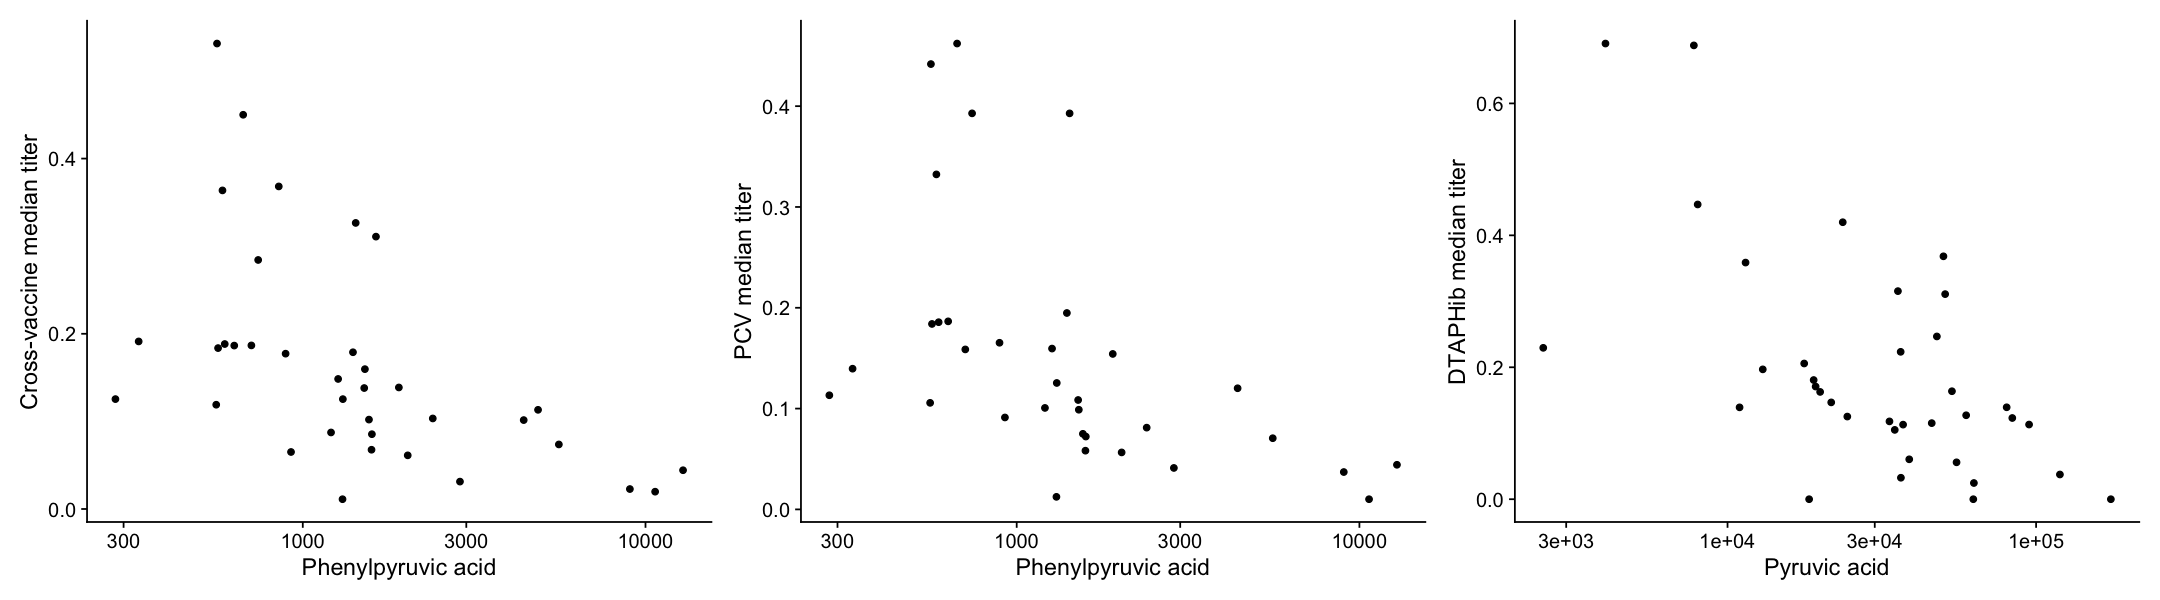

In [15]:
options(repr.plot.width=18, repr.plot.height=5)

phenylpyruvic_acid_cross = metab_abunds %>% filter(VisitCode == 'V5') %>%
                               ggplot(aes(x=`Phenylpyruvic acid`,  y=median_mmNorm)) + geom_point() +
                               theme_cowplot() + labs(y = "Cross-vaccine median titer") + xlim(0, 15000) + scale_x_continuous(trans='log10')

phenylpyruvic_acid_PCV = metab_abunds %>% filter(VisitCode == 'V5') %>%
                               ggplot(aes(x=`Phenylpyruvic acid`,  y=median_mmNorm_PCV)) + geom_point() +
                               theme_cowplot() + labs(y = "PCV median titer") + xlim(0, 15000) + scale_x_continuous(trans='log10')

pyruvic_acid_dtaphib = metab_abunds %>% filter(VisitCode == 'V5') %>%
                           ggplot(aes(x=`Pyruvic acid`,  y=median_mmNorm_DTAPHib)) + geom_point() +
                           theme_cowplot() + labs(y = "DTAPHib median titer") + xlim(0, 200000) + scale_x_continuous(trans='log10')

metab_plots = phenylpyruvic_acid_cross + phenylpyruvic_acid_PCV + pyruvic_acid_dtaphib + plot_layout(nrow = 1)
metab_plots
# ggsave('../../figures/paper/metabolites_correlated_w_titer.pdf', width = 18, height = 5, units = 'in', dpi = 600)

Warning message:
“Removed 9 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 9 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 9 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 9 rows containing missing values (`geom_point()`).”


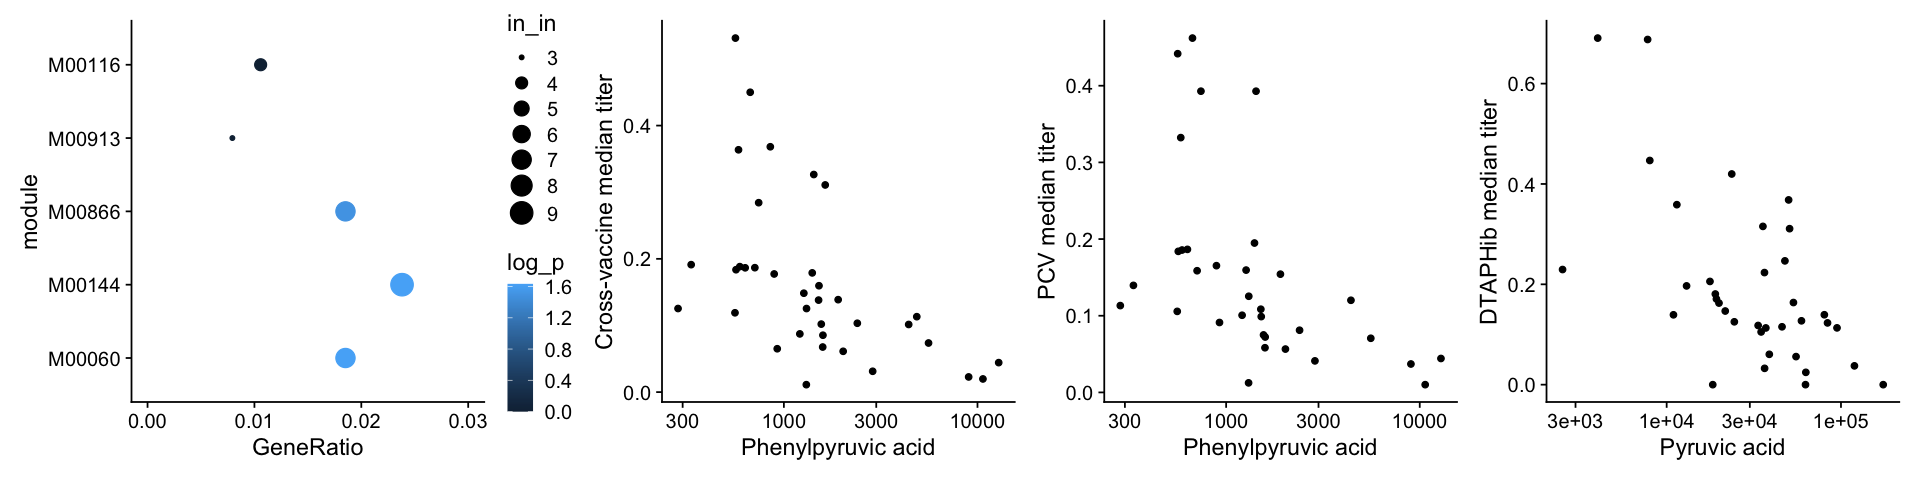

In [16]:
options(repr.plot.width=16, repr.plot.height=4)
# figure_4 = ko_plots / metab_plots
figure_3 = enirchment_plot + phenylpyruvic_acid_cross + phenylpyruvic_acid_PCV + pyruvic_acid_dtaphib + plot_layout(nrow = 1)
figure_3
ggsave('../figures/ko_modules_and_metabolites_correlated_w_titer.pdf', width = 16, height = 4, units = 'in', dpi = 600)